<a href="https://colab.research.google.com/github/BrendonBernardino/machine_learning_tcc/blob/master/DetectandSegment_yolov9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q roboflow supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 16.4 MB/s eta 0:00:00


In [4]:
from PIL import Image
import numpy as np
import supervision as sv
import cv2
import os

In [10]:
DETECT_DATA_PATH = "/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9/data.yaml"
DETECT_WEIGHTS_PATH = "/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9/runs/train/exp9/weights/best.pt"
DETECT_OUTPUT_PREDICT_PATH = "/content/drive/MyDrive/Dataset_TCC/yolo_process/cow_detect.yolov9/output2"

SEGMENT_DATA_PATH = "/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml"
SEGMENT_WEIGHTS_PATH = "/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt"
SEGMENT_OUTPUT_PREDICT_PATH = "/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2"

In [66]:
cd /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9


In [67]:
W_espcam = 288
H_espcam = 288

IMAGE_PATH = "/content/pic140.jpg"

dir_name, file_name = os.path.split(IMAGE_PATH)
name, ext = os.path.splitext(file_name)
OUTPUT_PATH = os.path.join(dir_name, f"{name}_resized{ext}")

img = Image.open(IMAGE_PATH)
img_resized = img.resize((W_espcam, H_espcam), Image.Resampling.LANCZOS)
img_resized.save(OUTPUT_PATH)

!python detect.py \
--img 288 --conf-thres 0.40 --device 0 \
--data {DETECT_DATA_PATH} \
--weights {DETECT_WEIGHTS_PATH} \
--source {OUTPUT_PATH} \
--project {DETECT_OUTPUT_PREDICT_PATH} \
--name count_cow_ \
--save-txt

detect: weights=['/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9/runs/train/exp9/weights/best.pt'], source=/content/pic140_resized.jpg, data=/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9/data.yaml, imgsz=[288, 288], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Dataset_TCC/yolo_process/cow_detect.yolov9/output2, name=count_cow_, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious p

In [68]:
image_path = OUTPUT_PATH
label_path = "/content/drive/MyDrive/Dataset_TCC/yolo_process/cow_detect.yolov9/output2/count_cow_8/labels/pic140_resized.txt"

image = cv2.imread(image_path)
image_count_cow = image.copy()

try:
    with open(label_path, "r") as f:
        detections = f.readlines()
    num_cattle = len(detections)
except FileNotFoundError:
    num_cattle = 0  # Se não houver arquivo de labels, assume 0 detecções

# cv2.putText(image_count_cow, f"Gado detectado: {num_cattle}", (20, 40), cv2.FONT_HERSHEY_SIMPLEX,
#             0.5, (0, 255, 0), 1, cv2.LINE_AA)

# sv.plot_images_grid(
#     images=[image, image_count_cow],
#     grid_size=(1, 2),
#     titles=['source image', 'segmented image']
# )

In [69]:
cd /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/segment

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/segment


In [63]:
# Função para calcular a área pela fórmula de Gauss (multiplica os pares de coord do polígono no sentido anti-horário)
def polygon_area(coords):
    x = np.array(coords[0::2])  # Pega os X
    y = np.array(coords[1::2])  # Pega os Y
    return 0.5 * abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

In [70]:
!python predict.py \
--imgsz 288 --conf-thres 0.60 --device 0 \
--data {SEGMENT_DATA_PATH} \
--weights {SEGMENT_WEIGHTS_PATH} \
--source {OUTPUT_PATH} \
--project {SEGMENT_OUTPUT_PREDICT_PATH} \
--name trough_level \
--save-txt

segment/predict: weights=['/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt'], source=/content/pic140_resized.jpg, data=/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml, imgsz=[288, 288], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2, name=trough_level, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the curre

Classe: 1 - Área: 393.00 pixels²
Classe: 1 - Área: 709.00 pixels²
Classe: 1 - Área: 1070.51 pixels²
Classe: 1 - Área: 884.01 pixels²
Classe: 1 - Área: 1451.99 pixels²
Classe: 1 - Área: 1270.00 pixels²
Área total de comida no cocho (em pixels): 5778.51 pixels²
Nivel de comida/sal: Cheio


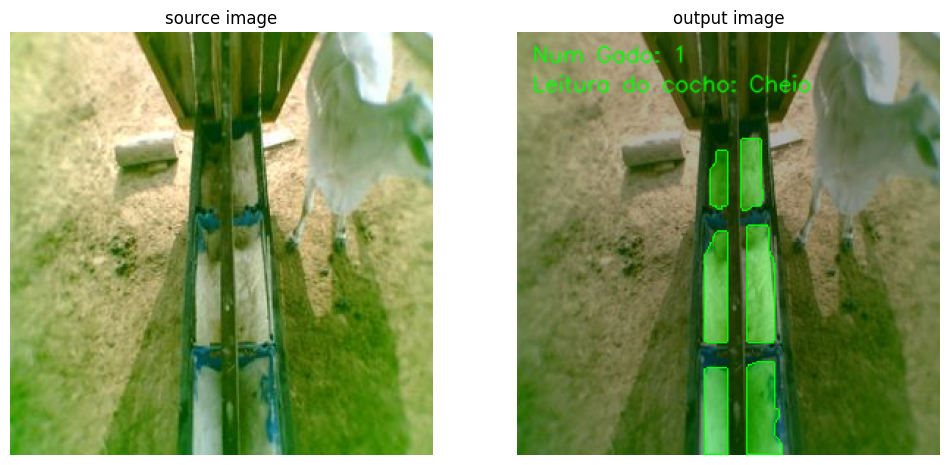

In [51]:
img = cv2.imread(OUTPUT_PATH)
img_original = img.copy()

mask = np.zeros_like(img) # Cria máscara preta do mesmo tamanho da imagem

max_area = 5500 #pixels
min_area = 2500 #pixels

txt_path = "/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2/trough_level3/labels/pic61_resized.txt"
total_area_food_trough = 0

contours = []
occluded_trough = 0
empty_trough = 0

with open(txt_path, "r") as file:
    for line in file:
        data = line.strip().split()  # Divide os valores
        data_coord = list(map(float, line.split()))

        class_id = int(data[0])  # Pos da classe no txt

        coords = data_coord[1:] # Pega apenas os pontos
        coords_pixels = [coords[i] * W_espcam if i % 2 == 0 else coords[i] * H_espcam for i in range(len(coords))] # Converte as coordenadas dos pixels de seg na imagem
        area = polygon_area(coords_pixels) # Calcula area

        points = np.array(data[1:], dtype=np.float32).reshape(-1, 2)  # Converte para float e reorganiza como pares (x, y)


        # Converte coordenadas normalizadas para pixels
        points[:, 0] *= W_espcam  # Multiplica largura
        points[:, 1] *= H_espcam  # Multiplica altura
        points = points.astype(np.int32)  # Converte para inteiros
        coords_pixels = points.astype(np.int32)

        contours.append(points)  # Adiciona à lista de contornos

        if class_id == 2:
          occluded_trough = 1
        if class_id == 0:
          empty_trough = 1

        if class_id == 1:
            total_area_food_trough += area

        print(f"Classe: {class_id} - Área: {area:.2f} pixels²")

print(f"Área total de comida no cocho (em pixels): {total_area_food_trough:.2f} pixels²")
if occluded_trough == 1:
    print("Imagem de cocho com oclusão")
    classification = "Oclusao"
    # text_color = (0, 255, 255)
elif empty_trough == 1:
    print("Nivel de comida/sal: Vazio")
    classification = "Vazio"
    text_color = (0, 0, 255)  # Vermelho
else:
  if total_area_food_trough > max_area:
      print("Nivel de comida/sal: Cheio")
      classification = "Cheio"
      text_color = (0, 255, 0)  # Verde
  else:
      print("Nivel de comida/sal: Médio")
      classification = "Medio"
      text_color = (0, 255, 255)  # Amarelo
  # else:
  #     print("Nivel de comida/sal: Vazio")
  #     classification = "Vazio"
  #     text_color = (0, 0, 255)  # Vermelho

overlay_or_not = img_original.copy()
if empty_trough != 1 and occluded_trough != 1:
  # Desenhar as máscaras na imagem
  cv2.polylines(img, contours, isClosed=True, color=(0, 255, 0), thickness=1)  # Borda verde
  cv2.fillPoly(mask, contours, (0, 255, 0))  # Máscara preenchida

  # Criar uma sobreposição da máscara na imagem original
  overlay_or_not = cv2.addWeighted(img, 0.7, mask, 0.3, 0)  # Ajuste dos pesos para transparência

cv2.putText(
    overlay_or_not, f"Leitura do cocho: {classification}",
    (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
    0.5, text_color, 1, cv2.LINE_AA
)

cv2.putText(overlay_or_not, f"Num Gado: {num_cattle}", (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 255, 0), 1, cv2.LINE_AA)

sv.plot_images_grid(
    images=[img_original, overlay_or_not],
    grid_size=(1, 2),
    titles=['source image', 'output image']
)

Classe: 1 - Área: 673.51 pixels²
Classe: 1 - Área: 915.99 pixels²
Classe: 1 - Área: 916.51 pixels²
Classe: 1 - Área: 548.00 pixels²
Classe: 1 - Área: 267.50 pixels²
Classe: 1 - Área: 1063.99 pixels²
Área total de comida no cocho (em pixels): 4385.50 pixels²
Nivel de comida/sal: Médio


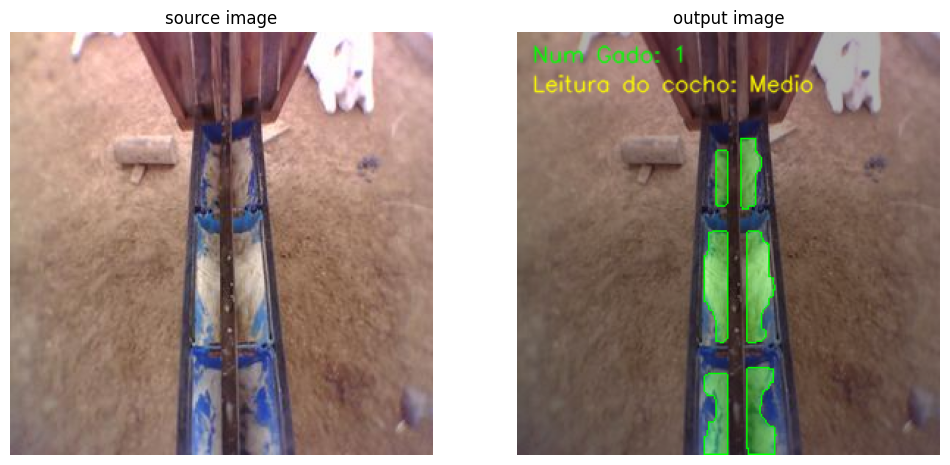

In [58]:
img = cv2.imread(OUTPUT_PATH)
img_original = img.copy()

mask = np.zeros_like(img) # Cria máscara preta do mesmo tamanho da imagem

max_area = 5500 #pixels
min_area = 2500 #pixels

txt_path = "/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2/trough_level4/labels/pic131_resized.txt"
total_area_food_trough = 0

contours = []
occluded_trough = 0
empty_trough = 0

with open(txt_path, "r") as file:
    for line in file:
        data = line.strip().split()  # Divide os valores
        data_coord = list(map(float, line.split()))

        class_id = int(data[0])  # Pos da classe no txt

        coords = data_coord[1:] # Pega apenas os pontos
        coords_pixels = [coords[i] * W_espcam if i % 2 == 0 else coords[i] * H_espcam for i in range(len(coords))] # Converte as coordenadas dos pixels de seg na imagem
        area = polygon_area(coords_pixels) # Calcula area

        points = np.array(data[1:], dtype=np.float32).reshape(-1, 2)  # Converte para float e reorganiza como pares (x, y)


        # Converte coordenadas normalizadas para pixels
        points[:, 0] *= W_espcam  # Multiplica largura
        points[:, 1] *= H_espcam  # Multiplica altura
        points = points.astype(np.int32)  # Converte para inteiros
        coords_pixels = points.astype(np.int32)

        contours.append(points)  # Adiciona à lista de contornos

        if class_id == 2:
          occluded_trough = 1
        if class_id == 0:
          empty_trough = 1

        if class_id == 1:
            total_area_food_trough += area

        print(f"Classe: {class_id} - Área: {area:.2f} pixels²")

print(f"Área total de comida no cocho (em pixels): {total_area_food_trough:.2f} pixels²")
if occluded_trough == 1:
    print("Imagem de cocho com oclusão")
    classification = "Oclusao"
    # text_color = (0, 255, 255)
elif empty_trough == 1:
    print("Nivel de comida/sal: Vazio")
    classification = "Vazio"
    text_color = (0, 0, 255)  # Vermelho
else:
  if total_area_food_trough > max_area:
      print("Nivel de comida/sal: Cheio")
      classification = "Cheio"
      text_color = (0, 255, 0)  # Verde
  else:
      print("Nivel de comida/sal: Médio")
      classification = "Medio"
      text_color = (0, 255, 255)  # Amarelo
  # else:
  #     print("Nivel de comida/sal: Vazio")
  #     classification = "Vazio"
  #     text_color = (0, 0, 255)  # Vermelho

overlay_or_not = img_original.copy()
if empty_trough != 1 and occluded_trough != 1:
  # Desenhar as máscaras na imagem
  cv2.polylines(img, contours, isClosed=True, color=(0, 255, 0), thickness=1)  # Borda verde
  cv2.fillPoly(mask, contours, (0, 255, 0))  # Máscara preenchida

  # Criar uma sobreposição da máscara na imagem original
  overlay_or_not = cv2.addWeighted(img, 0.7, mask, 0.3, 0)  # Ajuste dos pesos para transparência

cv2.putText(
    overlay_or_not, f"Leitura do cocho: {classification}",
    (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
    0.5, text_color, 1, cv2.LINE_AA
)

cv2.putText(overlay_or_not, f"Num Gado: {num_cattle}", (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 255, 0), 1, cv2.LINE_AA)

sv.plot_images_grid(
    images=[img_original, overlay_or_not],
    grid_size=(1, 2),
    titles=['source image', 'output image']
)

Classe: 0 - Área: 17924.02 pixels²
Área total de comida no cocho (em pixels): 0.00 pixels²
Nivel de comida/sal: Vazio


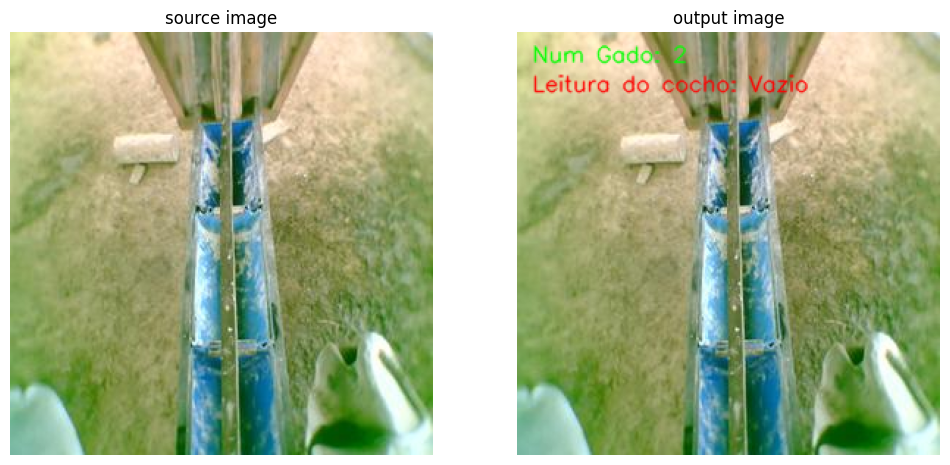

In [65]:
img = cv2.imread(OUTPUT_PATH)
img_original = img.copy()

mask = np.zeros_like(img) # Cria máscara preta do mesmo tamanho da imagem

max_area = 5500 #pixels
min_area = 2500 #pixels

txt_path = "/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2/trough_level5/labels/pic162_resized.txt"
total_area_food_trough = 0

contours = []
occluded_trough = 0
empty_trough = 0

with open(txt_path, "r") as file:
    for line in file:
        data = line.strip().split()  # Divide os valores
        data_coord = list(map(float, line.split()))

        class_id = int(data[0])  # Pos da classe no txt

        coords = data_coord[1:] # Pega apenas os pontos
        coords_pixels = [coords[i] * W_espcam if i % 2 == 0 else coords[i] * H_espcam for i in range(len(coords))] # Converte as coordenadas dos pixels de seg na imagem
        area = polygon_area(coords_pixels) # Calcula area

        points = np.array(data[1:], dtype=np.float32).reshape(-1, 2)  # Converte para float e reorganiza como pares (x, y)


        # Converte coordenadas normalizadas para pixels
        points[:, 0] *= W_espcam  # Multiplica largura
        points[:, 1] *= H_espcam  # Multiplica altura
        points = points.astype(np.int32)  # Converte para inteiros
        coords_pixels = points.astype(np.int32)

        contours.append(points)  # Adiciona à lista de contornos

        if class_id == 2:
          occluded_trough = 1
        if class_id == 0:
          empty_trough = 1

        if class_id == 1:
            total_area_food_trough += area

        print(f"Classe: {class_id} - Área: {area:.2f} pixels²")

print(f"Área total de comida no cocho (em pixels): {total_area_food_trough:.2f} pixels²")
if occluded_trough == 1:
    print("Imagem de cocho com oclusão")
    classification = "Oclusao"
    # text_color = (0, 255, 255)
elif empty_trough == 1:
    print("Nivel de comida/sal: Vazio")
    classification = "Vazio"
    text_color = (0, 0, 255)  # Vermelho
else:
  if total_area_food_trough > max_area:
      print("Nivel de comida/sal: Cheio")
      classification = "Cheio"
      text_color = (0, 255, 0)  # Verde
  else:
      print("Nivel de comida/sal: Médio")
      classification = "Medio"
      text_color = (0, 255, 255)  # Amarelo
  # else:
  #     print("Nivel de comida/sal: Vazio")
  #     classification = "Vazio"
  #     text_color = (0, 0, 255)  # Vermelho

overlay_or_not = img_original.copy()
if empty_trough != 1 and occluded_trough != 1:
  # Desenhar as máscaras na imagem
  cv2.polylines(img, contours, isClosed=True, color=(0, 255, 0), thickness=1)  # Borda verde
  cv2.fillPoly(mask, contours, (0, 255, 0))  # Máscara preenchida

  # Criar uma sobreposição da máscara na imagem original
  overlay_or_not = cv2.addWeighted(img, 0.7, mask, 0.3, 0)  # Ajuste dos pesos para transparência

cv2.putText(
    overlay_or_not, f"Leitura do cocho: {classification}",
    (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
    0.5, text_color, 1, cv2.LINE_AA
)

cv2.putText(overlay_or_not, f"Num Gado: {num_cattle}", (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 255, 0), 1, cv2.LINE_AA)

sv.plot_images_grid(
    images=[img_original, overlay_or_not],
    grid_size=(1, 2),
    titles=['source image', 'output image']
)

Classe: 2 - Área: 16313.51 pixels²
Área total de comida no cocho (em pixels): 0.00 pixels²
Imagem de cocho com oclusão


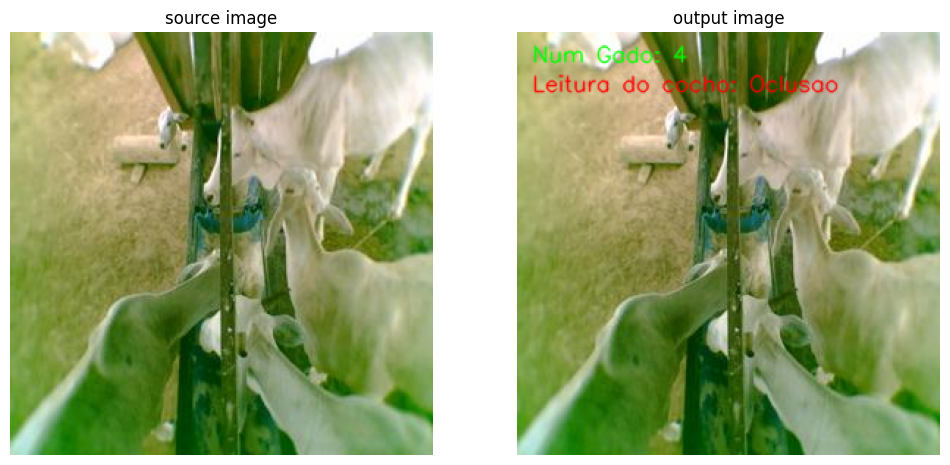

In [72]:
img = cv2.imread(OUTPUT_PATH)
img_original = img.copy()

mask = np.zeros_like(img) # Cria máscara preta do mesmo tamanho da imagem

max_area = 5500 #pixels
min_area = 2500 #pixels

txt_path = "/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2/trough_level6/labels/pic140_resized.txt"
total_area_food_trough = 0

contours = []
occluded_trough = 0
empty_trough = 0

with open(txt_path, "r") as file:
    for line in file:
        data = line.strip().split()  # Divide os valores
        data_coord = list(map(float, line.split()))

        class_id = int(data[0])  # Pos da classe no txt

        coords = data_coord[1:] # Pega apenas os pontos
        coords_pixels = [coords[i] * W_espcam if i % 2 == 0 else coords[i] * H_espcam for i in range(len(coords))] # Converte as coordenadas dos pixels de seg na imagem
        area = polygon_area(coords_pixels) # Calcula area

        points = np.array(data[1:], dtype=np.float32).reshape(-1, 2)  # Converte para float e reorganiza como pares (x, y)


        # Converte coordenadas normalizadas para pixels
        points[:, 0] *= W_espcam  # Multiplica largura
        points[:, 1] *= H_espcam  # Multiplica altura
        points = points.astype(np.int32)  # Converte para inteiros
        coords_pixels = points.astype(np.int32)

        contours.append(points)  # Adiciona à lista de contornos

        if class_id == 2:
          occluded_trough = 1
        if class_id == 0:
          empty_trough = 1

        if class_id == 1:
            total_area_food_trough += area

        print(f"Classe: {class_id} - Área: {area:.2f} pixels²")

print(f"Área total de comida no cocho (em pixels): {total_area_food_trough:.2f} pixels²")
if occluded_trough == 1:
    print("Imagem de cocho com oclusão")
    classification = "Oclusao"
    # text_color = (0, 255, 255)
elif empty_trough == 1:
    print("Nivel de comida/sal: Vazio")
    classification = "Vazio"
    text_color = (0, 0, 255)  # Vermelho
else:
  if total_area_food_trough > max_area:
      print("Nivel de comida/sal: Cheio")
      classification = "Cheio"
      text_color = (0, 255, 0)  # Verde
  else:
      print("Nivel de comida/sal: Médio")
      classification = "Medio"
      text_color = (0, 255, 255)  # Amarelo
  # else:
  #     print("Nivel de comida/sal: Vazio")
  #     classification = "Vazio"
  #     text_color = (0, 0, 255)  # Vermelho

overlay_or_not = img_original.copy()
if empty_trough != 1 and occluded_trough != 1:
  # Desenhar as máscaras na imagem
  cv2.polylines(img, contours, isClosed=True, color=(0, 255, 0), thickness=1)  # Borda verde
  cv2.fillPoly(mask, contours, (0, 255, 0))  # Máscara preenchida

  # Criar uma sobreposição da máscara na imagem original
  overlay_or_not = cv2.addWeighted(img, 0.7, mask, 0.3, 0)  # Ajuste dos pesos para transparência

cv2.putText(
    overlay_or_not, f"Leitura do cocho: {classification}",
    (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
    0.5, text_color, 1, cv2.LINE_AA
)

cv2.putText(overlay_or_not, f"Num Gado: {num_cattle}", (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 255, 0), 1, cv2.LINE_AA)

sv.plot_images_grid(
    images=[img_original, overlay_or_not],
    grid_size=(1, 2),
    titles=['source image', 'output image']
)